**Problem 1-Delivery Time** 

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
from google.colab import files 
uploaded=files.upload()

Saving delivery_time.csv to delivery_time (1).csv


In [26]:
import pandas as pd
delivery_time = pd.read_csv('delivery_time.csv')
delivery_time.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [27]:
delivery_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [28]:
import numpy as np

In [29]:
log_delivery_time = np.log(delivery_time)
print(log_delivery_time)


    Delivery Time  Sorting Time
0        3.044522      2.302585
1        2.602690      1.386294
2        2.983153      1.791759
3        3.178054      2.197225
4        3.367296      2.302585
5        2.731115      1.791759
6        2.944439      1.945910
7        2.251292      1.098612
8        2.884801      2.302585
9        2.931194      2.197225
10       2.987196      2.079442
11       2.374906      1.386294
12       2.814210      1.945910
13       2.442347      1.098612
14       2.487404      1.098612
15       2.700018      1.386294
16       2.621039      1.791759
17       2.896464      1.945910
18       2.079442      0.693147
19       2.880882      1.945910
20       3.068053      1.609438


<Axes: xlabel='Delivery Time', ylabel='Sorting Time'>

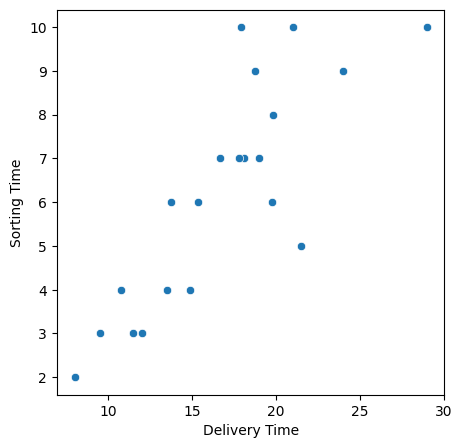

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize = (5,5))
sns.scatterplot(x = 'Delivery Time', y ='Sorting Time',data=delivery_time,palette = 'Set1')

In [31]:
delivery_time.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [32]:
import seaborn as sns 

<Axes: xlabel='Delivery Time', ylabel='Density'>

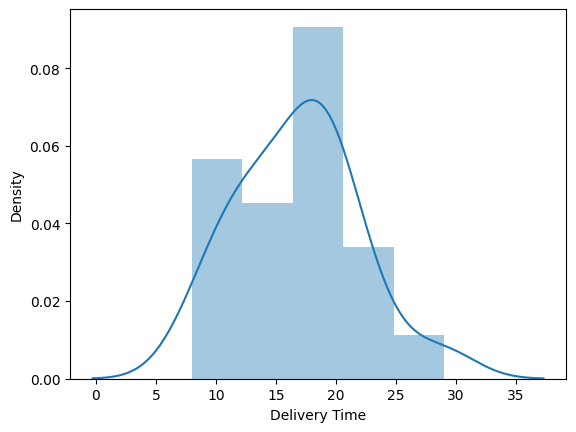

In [33]:
sns.distplot(delivery_time['Delivery Time'])

<Axes: xlabel='Sorting Time', ylabel='Density'>

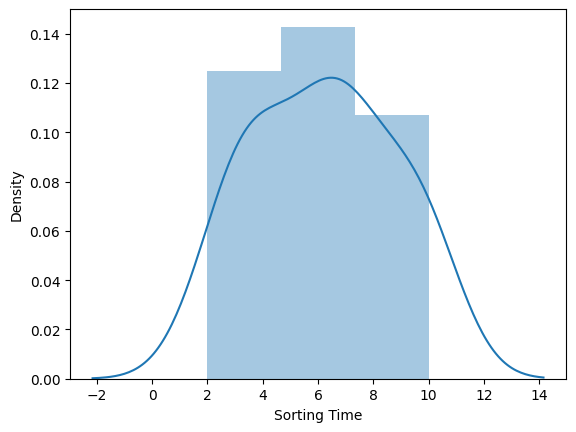

In [34]:
import seaborn as sns
sns.distplot(delivery_time['Sorting Time'])

In [35]:
import pandas as pd
df = pd.read_csv('delivery_time.csv')
SortingTime = df['Sorting Time']
DeliveryTime = df['Delivery Time']


In [36]:
import statsmodels.formula.api as smf 


In [37]:
model = smf.ols('SortingTime ~ DeliveryTime',data = delivery_time).fit()

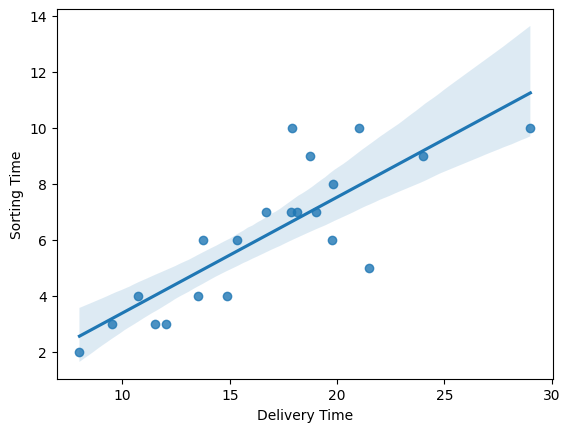

In [38]:
sns.regplot(x = 'Delivery Time', y ='Sorting Time',data=delivery_time);

In [39]:
model.params

Intercept      -0.756673
DeliveryTime    0.413744
dtype: float64

In [40]:
model.fittedvalues

0      7.931943
1      4.828866
2      7.414763
3      9.173174
4     11.241892
5      5.594291
6      7.104456
7      3.173891
8      6.649338
9      7.001020
10     7.447863
11     3.691071
12     6.144570
13     4.001378
14     4.220662
15     5.399832
16     4.932302
17     6.736224
18     2.553276
19     6.620376
20     8.138815
dtype: float64

In [41]:
model.resid

0     2.068057
1    -0.828866
2    -1.414763
3    -0.173174
4    -1.241892
5     0.405709
6    -0.104456
7    -0.173891
8     3.350662
9     1.998980
10    0.552137
11    0.308929
12    0.855430
13   -1.001378
14   -1.220662
15   -1.399832
16    1.067698
17    0.263776
18   -0.553276
19    0.379624
20   -3.138815
dtype: float64

In [42]:
model.rsquared

0.682271474841723

In [43]:
model.pvalues

Intercept       0.512611
DeliveryTime    0.000004
dtype: float64

In [44]:
delivery_time

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [45]:
delivery_time['Predicted']=model.fittedvalues 
delivery_time 

,Delivery Time,Sorting Time,Predicted
0,21.00,10,7.931943
1,13.50,4,4.828866
2,19.75,6,7.414763
3,24.00,9,9.173174
4,29.00,10,11.241892
5,15.35,6,5.594291
6,19.00,7,7.104456
7,9.50,3,3.173891
8,17.90,10,6.649338
9,18.75,9,7.001020


In [46]:
delivery_time['Error']=model.resid
delivery_time

,Delivery Time,Sorting Time,Predicted,Error
0,21.00,10,7.931943,2.068057
1,13.50,4,4.828866,-0.828866
2,19.75,6,7.414763,-1.414763
3,24.00,9,9.173174,-0.173174
4,29.00,10,11.241892,-1.241892
5,15.35,6,5.594291,0.405709
6,19.00,7,7.104456,-0.104456
7,9.50,3,3.173891,-0.173891
8,17.90,10,6.649338,3.350662
9,18.75,9,7.001020,1.998980


**Problem 2-Salary Data**

In [47]:
import warnings
warnings.filterwarnings('ignore')

In [48]:
import pandas as pd 

In [49]:
from google.colab import files 
uploaded=files.upload()

Saving Salary_Data.csv to Salary_Data (1).csv


In [50]:
import pandas as pd
Salary_Data = pd.read_csv('Salary_Data.csv')
Salary_Data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [51]:
Salary_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [52]:
import numpy as np
log_Salary_Data = np.log(Salary_Data)
print(log_Salary_Data)

    YearsExperience     Salary
0          0.095310  10.580073
1          0.262364  10.740843
2          0.405465  10.538237
3          0.693147  10.681091
4          0.788457  10.593906
5          1.064711  10.944506
6          1.098612  11.004597
7          1.163151  10.904946
8          1.163151  11.073567
9          1.308333  10.954117
10         1.360977  11.054344
11         1.386294  10.929422
12         1.386294  10.950052
13         1.410987  10.952227
14         1.504077  11.020447
15         1.589235  11.126351
16         1.629241  11.097849
17         1.667707  11.327656
18         1.774952  11.306676
19         1.791759  11.450412
20         1.916923  11.426692
21         1.960095  11.495505
22         2.066863  11.525861
23         2.104134  11.642303
24         2.163323  11.603049
25         2.197225  11.567243
26         2.251292  11.669664
27         2.261763  11.631908
28         2.332144  11.714976
29         2.351375  11.710727


<Axes: xlabel='YearsExperience', ylabel='Salary'>

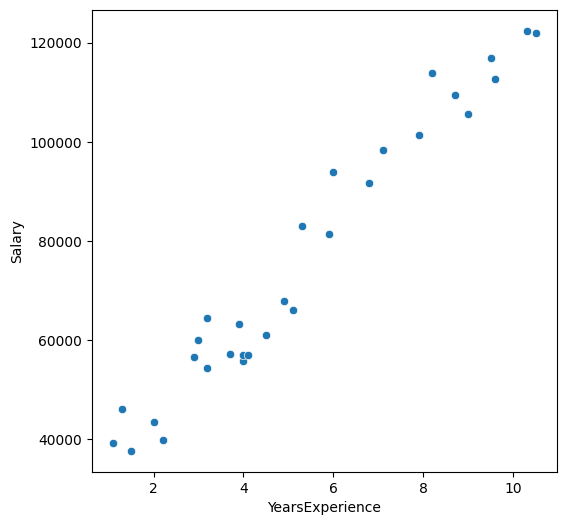

In [53]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure(figsize = (6,6))
sns.scatterplot(x = 'YearsExperience',y='Salary',data = Salary_Data,palette = 'Set1')

In [54]:
Salary_Data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='Salary', ylabel='Density'>

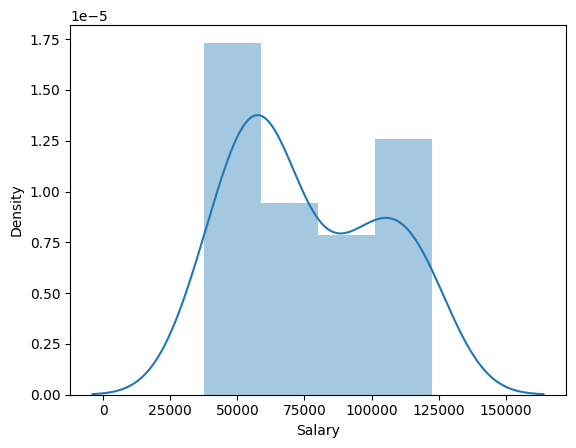

In [55]:
import seaborn as sns
sns.distplot(Salary_Data['Salary'])

<Axes: xlabel='YearsExperience', ylabel='Density'>

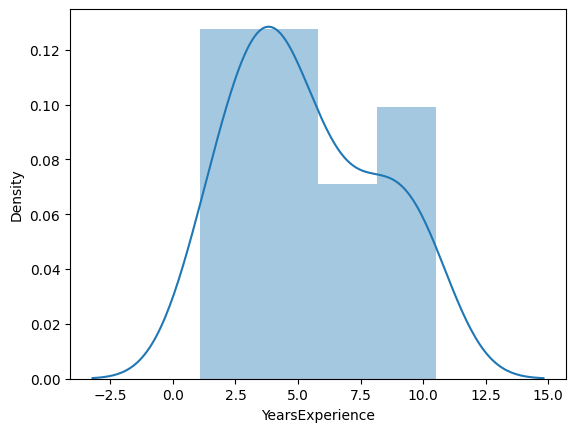

In [56]:
import seaborn as sns
sns.distplot(Salary_Data['YearsExperience'])

In [57]:
import statsmodels.formula.api as smf

In [58]:
model = smf.ols('YearsExperience~Salary',data=Salary_Data).fit()

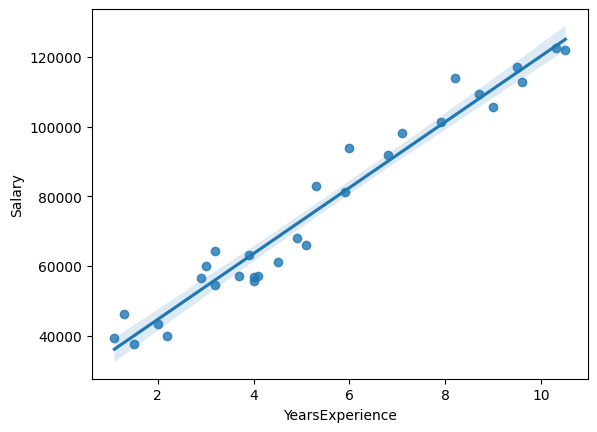

In [59]:
sns.regplot(x = 'YearsExperience',y='Salary',data = Salary_Data);

In [60]:
model.params

Intercept   -2.383161
Salary       0.000101
dtype: float64

In [61]:
model.fittedvalues

0      1.600934
1      2.295819
2      1.437694
3      2.024427
4      1.656428
5      3.352729
6      3.707969
7      3.130248
8      4.142905
9      3.408121
10     4.018652
11     3.266856
12     3.384628
13     3.397185
14     3.805285
15     4.496626
16     4.303310
17     6.030801
18     5.856117
19     7.129735
20     6.906748
21     7.568520
22     7.875253
23     9.142087
24     8.698442
25     8.308670
26     9.461782
27     9.022897
28    10.010845
29     9.958288
dtype: float64

In [62]:
model.resid

0    -0.500934
1    -0.995819
2     0.062306
3    -0.024427
4     0.543572
5    -0.452729
6    -0.707969
7     0.069752
8    -0.942905
9     0.291879
10   -0.118652
11    0.733144
12    0.615372
13    0.702815
14    0.694715
15    0.403374
16    0.796690
17   -0.730801
18    0.043883
19   -1.129735
20   -0.106748
21   -0.468520
22    0.024747
23   -0.942087
24    0.001558
25    0.691330
26    0.038218
27    0.577103
28    0.289155
29    0.541712
dtype: float64

In [63]:
model.rsquared

0.9569566641435086

In [64]:
model.pvalues 

Intercept    6.300123e-08
Salary       1.143068e-20
dtype: float64

In [65]:
Salary_Data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [66]:
Salary_Data['Predicted']=model.fittedvalues
Salary_Data

,YearsExperience,Salary,Predicted
0,1.1,39343.0,1.600934
1,1.3,46205.0,2.295819
2,1.5,37731.0,1.437694
3,2.0,43525.0,2.024427
4,2.2,39891.0,1.656428
5,2.9,56642.0,3.352729
6,3.0,60150.0,3.707969
7,3.2,54445.0,3.130248
8,3.2,64445.0,4.142905
9,3.7,57189.0,3.408121


In [67]:
Salary_Data['Error']=model.resid
Salary_Data

,YearsExperience,Salary,Predicted,Error
0,1.1,39343.0,1.600934,-0.500934
1,1.3,46205.0,2.295819,-0.995819
2,1.5,37731.0,1.437694,0.062306
3,2.0,43525.0,2.024427,-0.024427
4,2.2,39891.0,1.656428,0.543572
5,2.9,56642.0,3.352729,-0.452729
6,3.0,60150.0,3.707969,-0.707969
7,3.2,54445.0,3.130248,0.069752
8,3.2,64445.0,4.142905,-0.942905
9,3.7,57189.0,3.408121,0.291879


In [68]:
Salary_Data['Error_sq']=model.fittedvalues
Salary_Data

,YearsExperience,Salary,Predicted,Error,Error_sq
0,1.1,39343.0,1.600934,-0.500934,1.600934
1,1.3,46205.0,2.295819,-0.995819,2.295819
2,1.5,37731.0,1.437694,0.062306,1.437694
3,2.0,43525.0,2.024427,-0.024427,2.024427
4,2.2,39891.0,1.656428,0.543572,1.656428
5,2.9,56642.0,3.352729,-0.452729,3.352729
6,3.0,60150.0,3.707969,-0.707969,3.707969
7,3.2,54445.0,3.130248,0.069752,3.130248
8,3.2,64445.0,4.142905,-0.942905,4.142905
9,3.7,57189.0,3.408121,0.291879,3.408121


In [69]:
Mean_Squared_Error=Salary_Data['Error_sq'].mean()
Mean_Squared_Error

5.313333333333331